<a href="https://colab.research.google.com/github/Boat2356/Exploratory-Data-Analysis-and-Heart-Disease-Prediction-Using-Machine-Learning/blob/main/EDA_%2B_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# **Exploratory Data Analysis (EDA)**

In [2]:
!gdown 1s_AoUD9C5RxrKs_LsHrIh_HiZ53Y6xn4

Downloading...
From: https://drive.google.com/uc?id=1s_AoUD9C5RxrKs_LsHrIh_HiZ53Y6xn4
To: /content/CVD_cleaned.zip
100% 4.49M/4.49M [00:00<00:00, 13.3MB/s]


In [3]:
!unzip CVD_cleaned.zip

Archive:  CVD_cleaned.zip
  inflating: CVD_cleaned.csv         


In [4]:
df = pd.read_csv("CVD_cleaned.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


**ตัวแปรต้น (Independent variables)**

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

**หาข้อมูลที่ขาดหาย (Missing Values)**

In [ ]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [ ]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### เพศใดมีความถี่ของการเป็นและไม่เป็นโรคหัวใจมากกว่า?

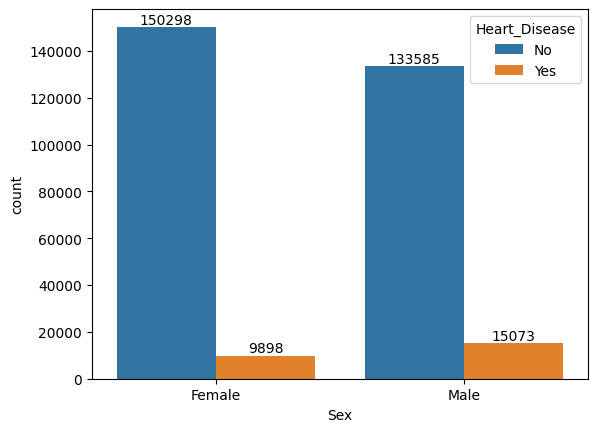

In [ ]:
ax = sns.countplot(data=df, x="Sex", hue="Heart_Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

In [ ]:
# Filter แยกคนเป็นโรคกับไม่เป็นโรค
is_Heart_disease = df.loc[df['Heart_Disease'] == 'Yes']
isNot_Heart_disease = df.loc[df['Heart_Disease'] == 'No']

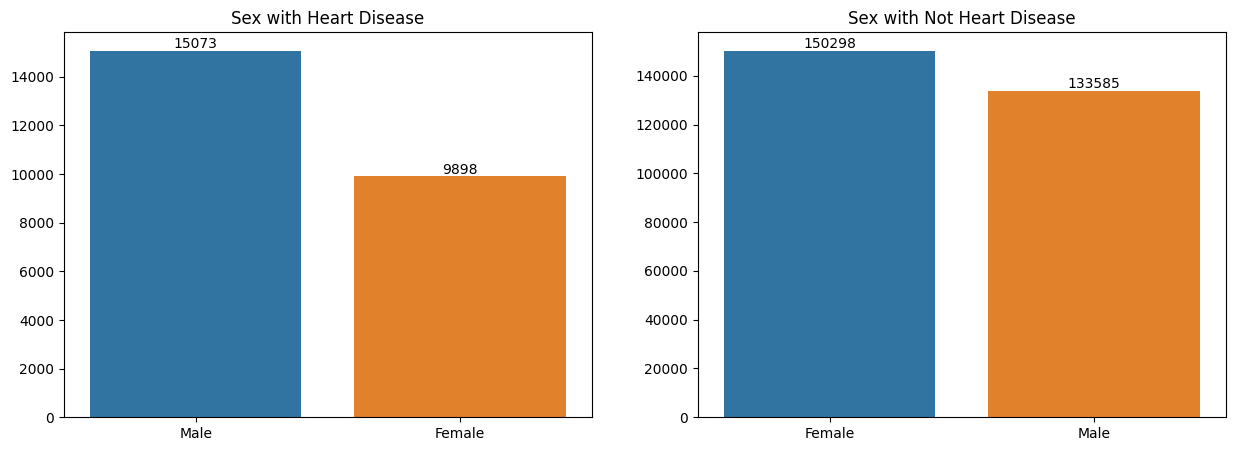

In [ ]:
fig, axes = plt.subplots(1, 2,figsize = (15,5))

sex_counts = is_Heart_disease['Sex'].value_counts()
ax = sns.barplot(x = sex_counts.index, y = sex_counts.values , data = is_Heart_disease,ax = axes[0])
axes[0].set_title("Sex with Heart Disease")

for container in ax.containers: # showing values
    ax.bar_label(container)

sex_counts2 = isNot_Heart_disease['Sex'].value_counts()
ax = sns.barplot(x = sex_counts2.index, y = sex_counts2.values , data = isNot_Heart_disease,ax = axes[1])
axes[1].set_title("Sex with Not Heart Disease")

for container in ax.containers: # showing values
    ax.bar_label(container)

### อายุช่วงใดมีความถี่ของการเป็นและไม่เป็นโรคหัวใจมากกว่า?

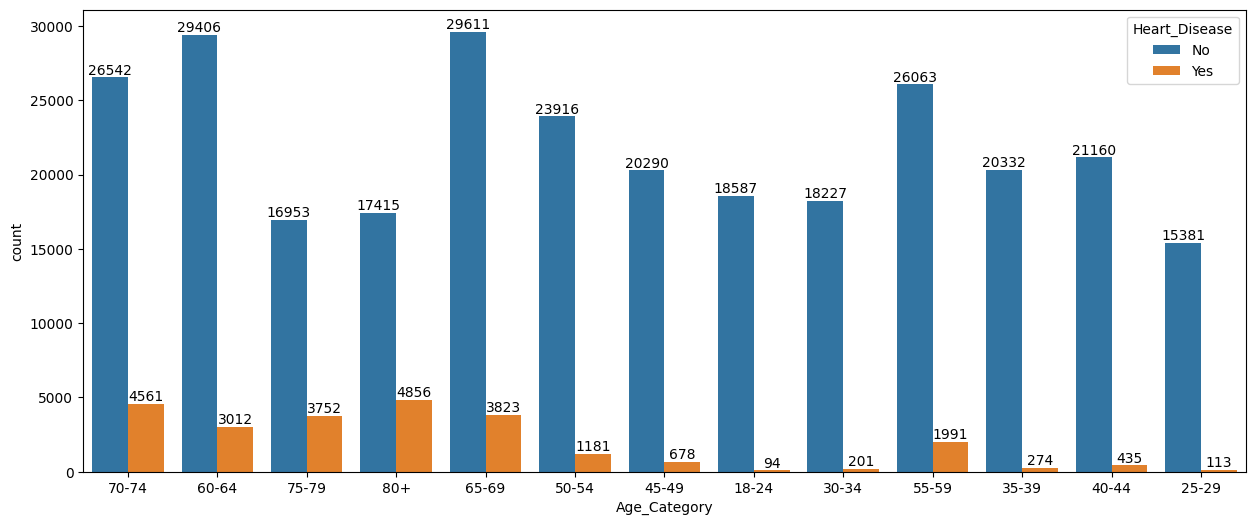

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.countplot(data=df, x="Age_Category", hue="Heart_Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

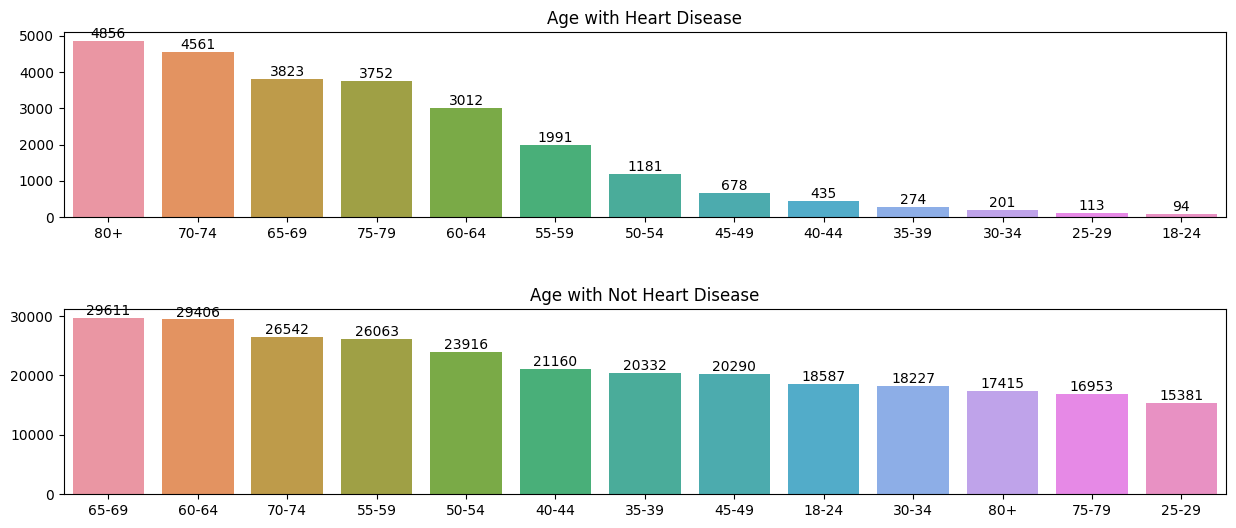

In [ ]:
fig, axes = plt.subplots(2, 1,figsize = (15,6))
age_counts = is_Heart_disease['Age_Category'].value_counts()
ax = sns.barplot(x = age_counts.index, y = age_counts.values , data = is_Heart_disease,ax = axes[0])
axes[0].set_title("Age with Heart Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

age_counts2 = isNot_Heart_disease['Age_Category'].value_counts()
ax = sns.barplot(x = age_counts2.index, y = age_counts2.values , data = isNot_Heart_disease,ax = axes[1])
axes[1].set_title("Age with Not Heart Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

plt.subplots_adjust(hspace=0.5) # Alignment between graph


### นํ้าหนัก, ส่วนสูง, BMI ของคนที่เป็นโรคและไม่เป็นโรคหัวใจแตกต่างกันหรือไม่

In [ ]:
df[['Weight_(kg)','Height_(cm)','BMI']].mean() #ค่าเฉลี่ย

Weight_(kg)     83.588655
Height_(cm)    170.615249
BMI             28.626211
dtype: float64

In [ ]:
df[['Weight_(kg)','Height_(cm)','BMI']].mode() #ฐานนิยม

,Weight_(kg),Height_(cm),BMI
0,90.72,168.0,26.63


In [ ]:
df[['Weight_(kg)','Height_(cm)','BMI']].median() #มัธยฐาน

Weight_(kg)     81.65
Height_(cm)    170.00
BMI             27.44
dtype: float64

**Distribution plot of Weight, Height, BMI**

<Axes: xlabel='BMI', ylabel='Count'>

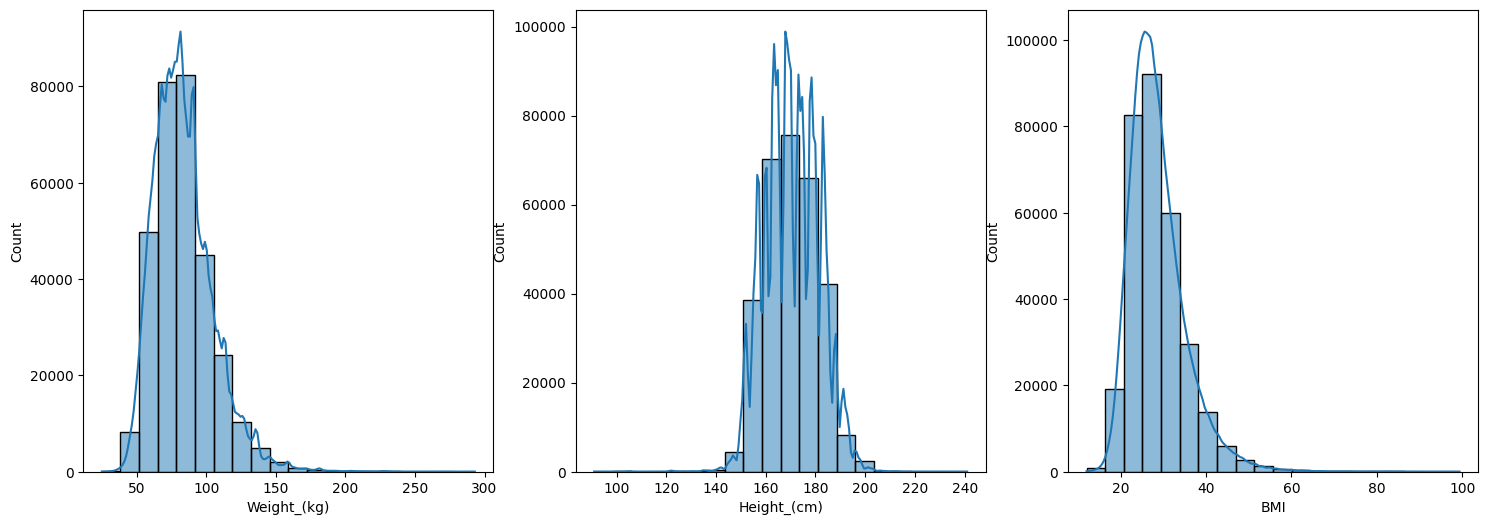

In [ ]:
qfig, axes = plt.subplots(1,3,figsize = (18,6))
sns.histplot(df, x="Weight_(kg)", bins=20,kde=True,ax = axes[0])
sns.histplot(df, x="Height_(cm)", bins=20,kde=True,ax = axes[1])
sns.histplot(df, x="BMI", bins=20,kde=True,ax = axes[2])


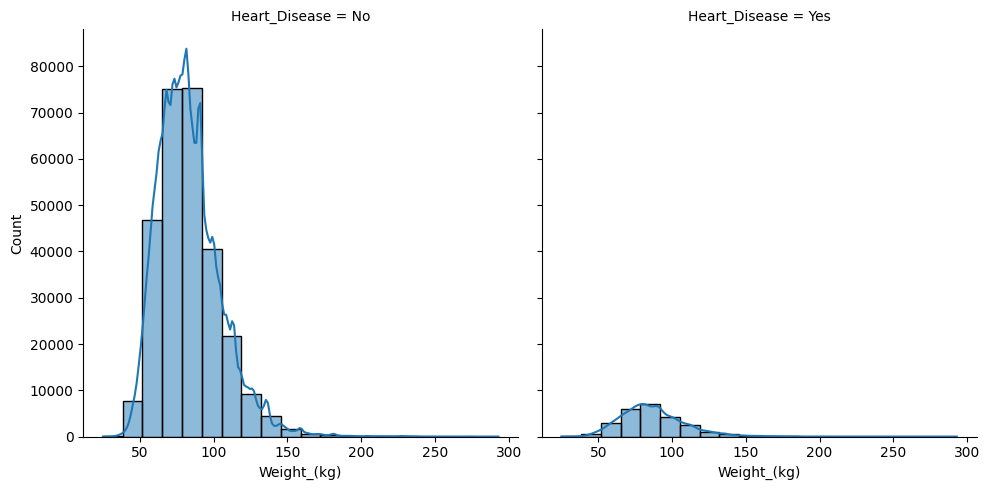

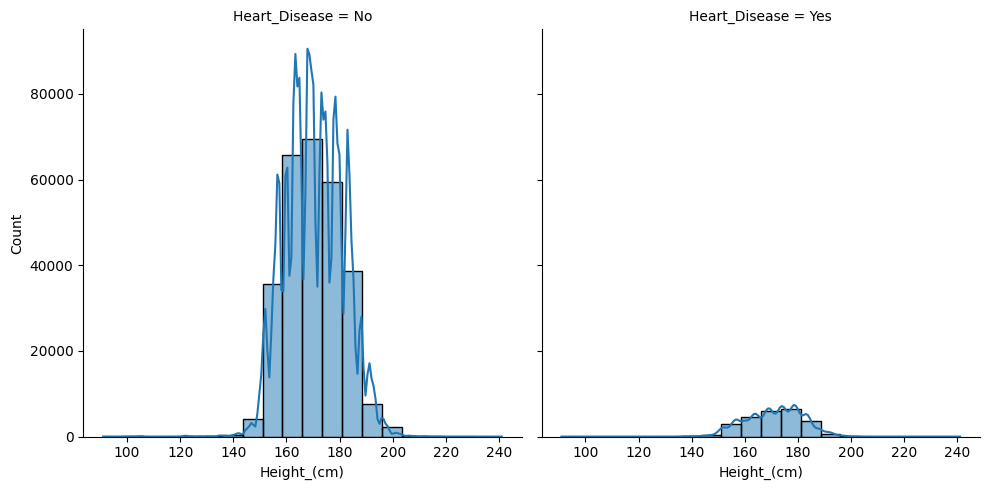

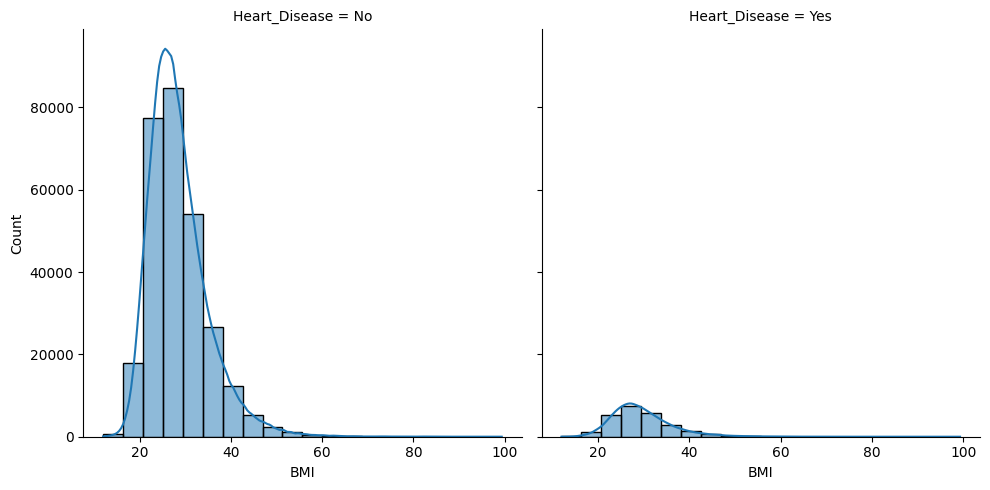

In [ ]:
#fig, axes = plt.subplots(1,3,figsize = (10,6))
sns.displot(df, x="Weight_(kg)", bins=20,col = "Heart_Disease",kde=True)
sns.displot(df, x="Height_(cm)", bins=20,col = "Heart_Disease",kde=True)
sns.displot(df, x="BMI", bins=20,col = "Heart_Disease",kde=True)

**Boxplot of Weight, Height, BMI**

In [ ]:
medians = df.groupby(['Heart_Disease'])['Weight_(kg)'].mean()
medians2 = df.groupby(['Heart_Disease'])['Height_(cm)'].median()
medians3 = df.groupby(['Heart_Disease'])['BMI'].mean()
medians3
print(medians3)

Heart_Disease
No     28.543676
Yes    29.564505
Name: BMI, dtype: float64


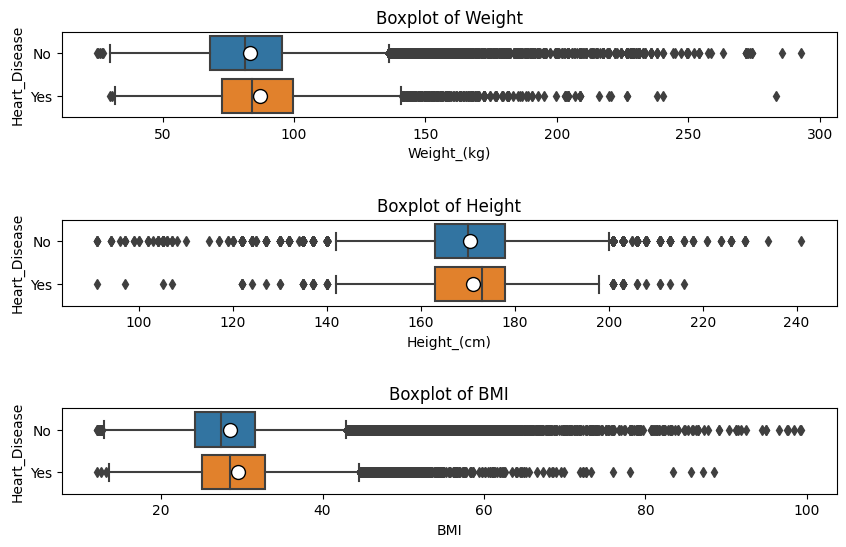

In [ ]:
fig, axes = plt.subplots(3, 1,figsize = (10,6))
ax = sns.boxplot(x="Weight_(kg)",y="Heart_Disease",data=df,ax = axes[0],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[0].set_title("Boxplot of Weight")

ax2 = sns.boxplot(x="Height_(cm)",y="Heart_Disease",data=df,ax = axes[1],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[1].set_title("Boxplot of Height")

ax3 = sns.boxplot(x="BMI",y="Heart_Disease",data=df,ax = axes[2],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[2].set_title("Boxplot of BMI")

plt.subplots_adjust(hspace=1.2)



### คนที่เป็นและไม่เป็นโรคหัวใจมีความถี่ของระดับสุขภาพเป็นอย่างไร

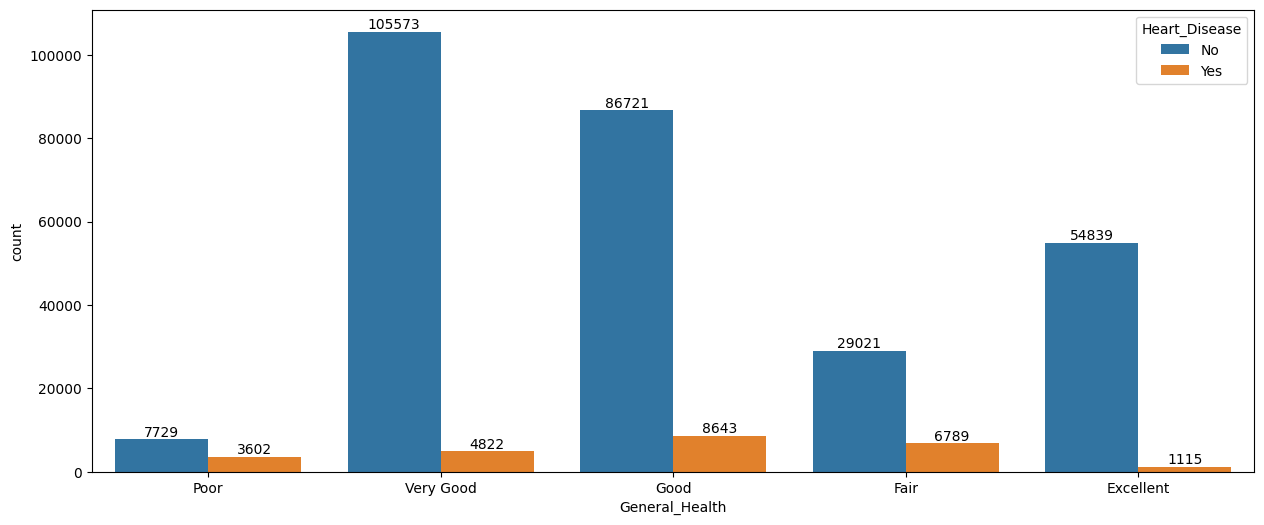

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.countplot(data=df, x="General_Health", hue="Heart_Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

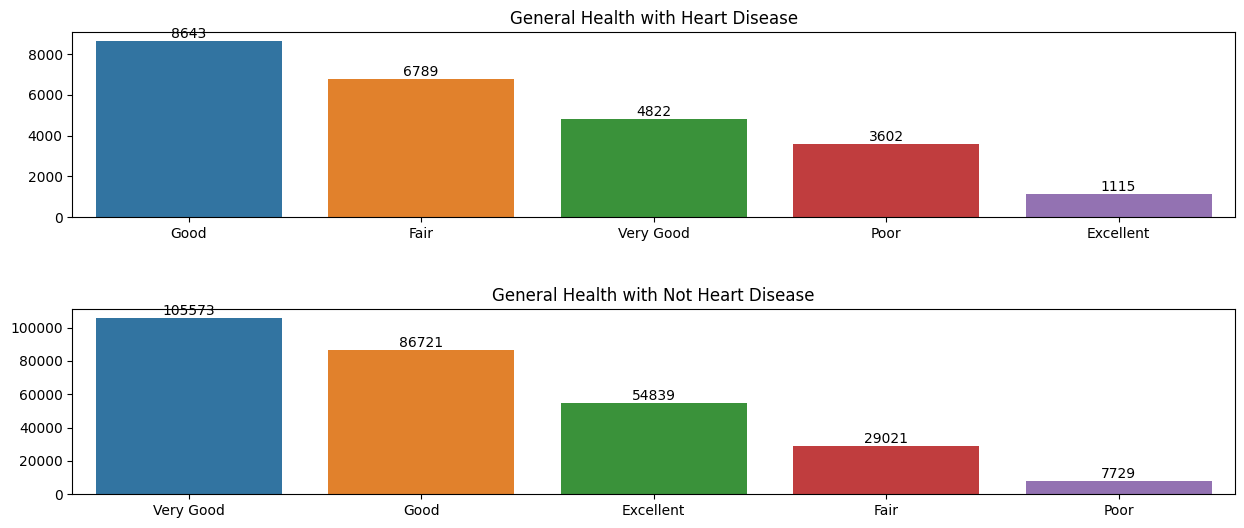

In [ ]:
fig, axes = plt.subplots(2, 1,figsize = (15,6))
health_counts = is_Heart_disease['General_Health'].value_counts()
ax = sns.barplot(x = health_counts.index, y = health_counts.values , data = is_Heart_disease,ax = axes[0])
axes[0].set_title("General Health with Heart Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

health_counts2 = isNot_Heart_disease['General_Health'].value_counts()
ax = sns.barplot(x = health_counts2.index, y = health_counts2.values , data = isNot_Heart_disease,ax = axes[1])
axes[1].set_title("General Health with Not Heart Disease")
for container in ax.containers: # showing values
    ax.bar_label(container)

plt.subplots_adjust(hspace=0.5) # Alignment between graph


### สัดส่วนของคนที่เป็นและไม่เป็นโรคหัวใจ โรคมะเร็งผิวหนัง โรคมะเร็งอื่นๆ โรคซึมเศร้า โรคเบาหวาน และโรคข้ออักเสบ เป็นอย่างไร

In [ ]:
#Check unique of Diabetes
df['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [ ]:
# Data Transformation
df['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No', inplace=True)
df['Diabetes'].replace('Yes, but female told only during pregnancy', 'Yes', inplace=True)

In [ ]:
#Check unique after transform
df['Diabetes'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
Is_HD = np.where(df['Heart_Disease'] == 'Yes',1,0)
Percent_IsHd = Is_HD.sum() / len(df['Heart_Disease']) * 100
#print("Percent of Heart Disease = ",Percent_IsHd)
print("\nFrequency of people who have Heart Disease = ",Is_HD.sum())

Is_Skincancer = np.where(df['Skin_Cancer'] == 'Yes',1,0)
Percent_IsSkincancer = Is_Skincancer.sum() / len(df['Skin_Cancer']) * 100
#print("\nPercent of Skin cancer = ",Percent_IsSkincancer)
print("\nFrequency of people who have Skin cancer  = ",Is_Skincancer.sum())

Is_otherSkincancer = np.where(df['Other_Cancer'] == 'Yes',1,0)
Percent_IsotherSkincancer = Is_otherSkincancer.sum() / len(df['Other_Cancer']) * 100
#print("\nPercent of Other cancer = ",Percent_IsotherSkincancer)
print("\nFrequency of people who have Other Cancer = ",Is_otherSkincancer.sum())

Is_Depression = np.where(df['Depression'] == 'Yes',1,0)
Percent_Depression = Is_Depression.sum() / len(df['Depression']) * 100
#print("\nPercent of Other cancer = ",Percent_Depression)
print("\nFrequency of people who have Depression = ",Is_Depression.sum())


Is_Diabetes = np.where(df['Diabetes'] == 'Yes',1,0)
Percent_Diabetes = Is_Diabetes.sum() / len(df['Diabetes']) * 100
#print("\nPercent of Diabetes = ",Percent_Diabetes)
print("\nFrequency of people who have Diabetes = ",Is_Diabetes.sum())


Is_Arthritis = np.where(df['Arthritis'] == 'Yes',1,0)
Percent_Arthritis = Is_Arthritis.sum() / len(df['Arthritis']) * 100
#print("\nPercent of Other Arthritis = ",Percent_Arthritis)
print("\nFrequency of people who have Arthritis = ",Is_Arthritis.sum())




Frequency of people who have Heart Disease =  24971

Frequency of people who have Skin cancer  =  29994

Frequency of people who have Other Cancer =  29878

Frequency of people who have Depression =  61901

Frequency of people who have Diabetes =  40171

Frequency of people who have Arthritis =  101071


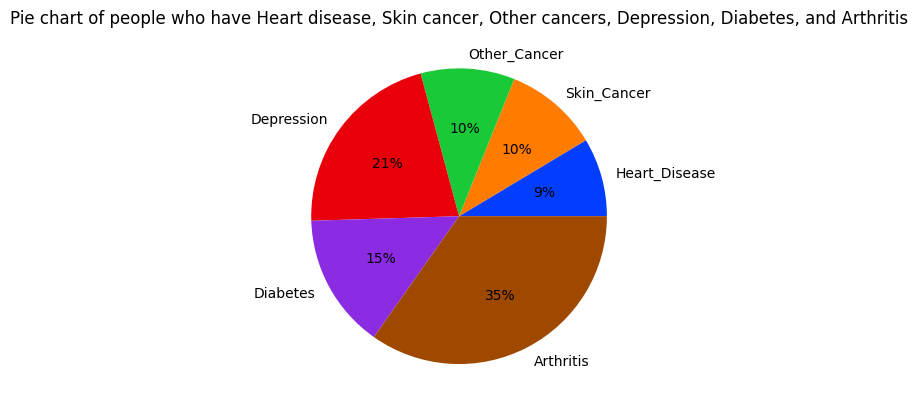

In [ ]:
data2 = []
data2.append([Is_HD.sum(),Is_Skincancer.sum(),Is_otherSkincancer.sum(),Is_Depression.sum(),Is_Diabetes.sum(),Is_Arthritis.sum()])

binary_categorical_vars = ["Heart_Disease", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Arthritis"]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

for d in data2:
# plotting data on chart
  plt.pie(d, labels=binary_categorical_vars, colors=palette_color, autopct='%.0f%%')

plt.title("Pie chart of people who have Heart disease, Skin cancer, Other cancers, Depression, Diabetes, and Arthritis")
plt.show()

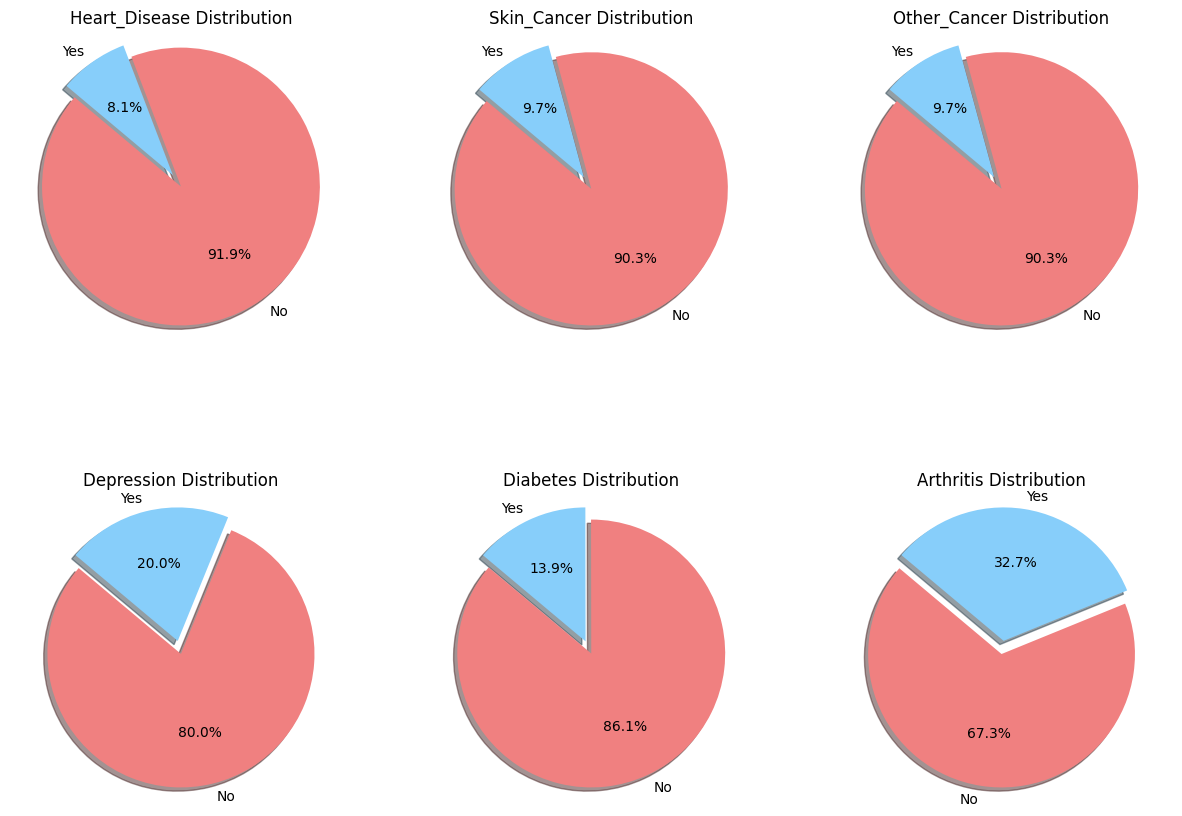

In [ ]:
# List of binary categorical variables
binary_categorical_vars = ["Heart_Disease", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Arthritis"]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Plot pie charts for each variable
for i, var in enumerate(binary_categorical_vars):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    labels = ['No', 'Yes']
    sizes = df[var].value_counts()
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode the first slice (Yes)

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax.set_title(f"{var} Distribution")

# Show the subplots
plt.show()

### คนที่เป็น / ไม่เป็นโรคหัวใจ มีความถี่ของการเป็นโรคผิวหนัง โรคผิวหนังอื่นๆ โรคซึมเศร้า โรคเบาหวาน และโรคข้ออักเสบ อย่างไรบ้าง

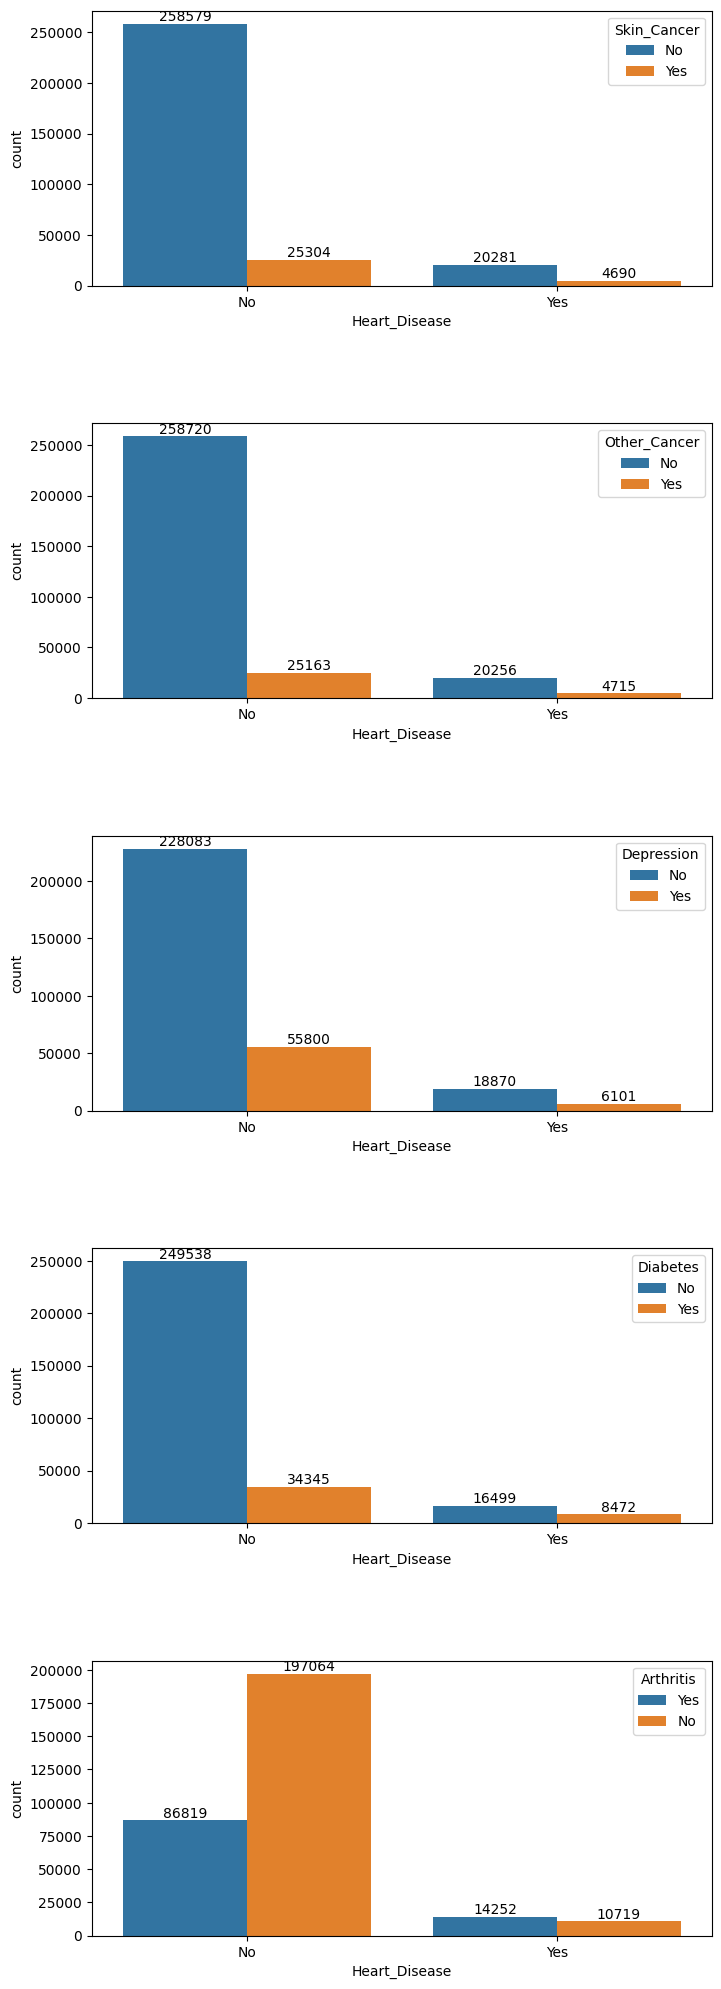

In [ ]:
fig , axes = plt.subplots(5,1,figsize=(8,25))
ax = sns.countplot(data=df, x="Heart_Disease", hue="Skin_Cancer",ax = axes[0])
for container in ax.containers: # showing values
    ax.bar_label(container)

ax = sns.countplot(data=df, x="Heart_Disease", hue="Other_Cancer",ax = axes[1])
for container in ax.containers: # showing values
    ax.bar_label(container)

ax = sns.countplot(data=df, x="Heart_Disease", hue="Depression",ax = axes[2])
for container in ax.containers: # showing values
    ax.bar_label(container)

ax = sns.countplot(data=df, x="Heart_Disease", hue="Diabetes",ax = axes[3])
for container in ax.containers: # showing values
    ax.bar_label(container)

ax = sns.countplot(data=df, x="Heart_Disease", hue="Arthritis",ax = axes[4])
for container in ax.containers: # showing values
    ax.bar_label(container)

plt.subplots_adjust(hspace=0.5) # Alignment between graph


### ปริมาณการดื่มแอลกอฮอล์ การรับประทานผลไม้ การรับประทานผักใบเขียว และการรับประทานมันฝรั่งทอด (French fried) ของคนเป็นและไม่เป็นโรคหัวใจ มีความแตกต่างกันหรือไม่

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
is_Heart_disease['Alcohol_Consumption'].mean()

4.085338993232149

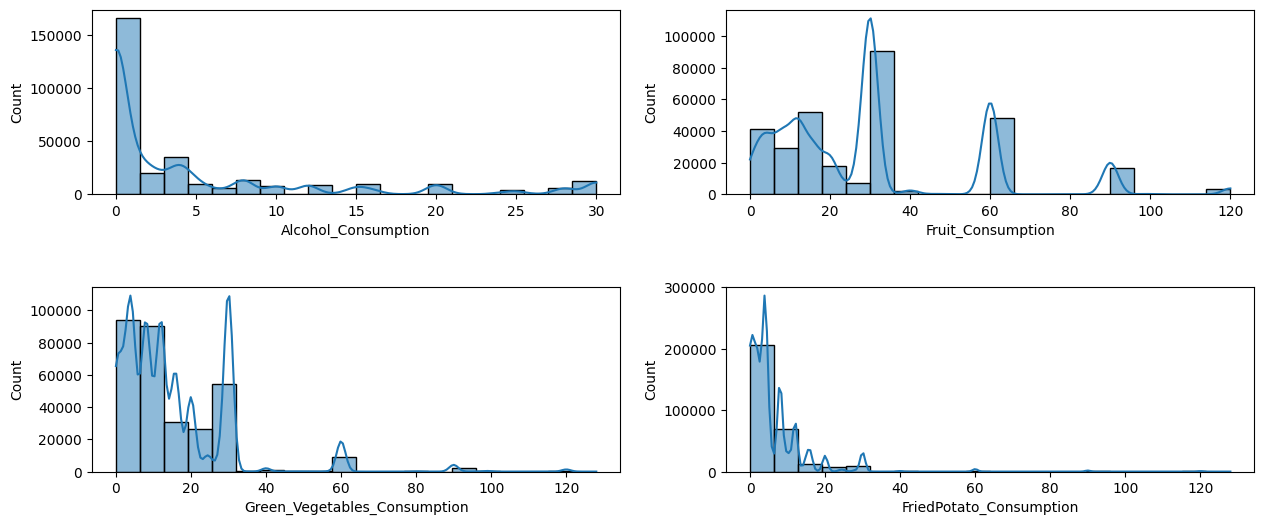

In [ ]:
fig, axes = plt.subplots(2,2,figsize = (15,6))
sns.histplot(df, x="Alcohol_Consumption", bins=20,ax = axes[0][0],kde = True)
sns.histplot(df, x="Fruit_Consumption", bins=20,ax = axes[0][1],kde = True)
sns.histplot(df, x="Green_Vegetables_Consumption",bins=20,ax = axes[1][0],kde = True)
sns.histplot(df, x="FriedPotato_Consumption", bins=20,ax = axes[1][1],kde = True)
plt.subplots_adjust(hspace=0.5) # Alignment between graph


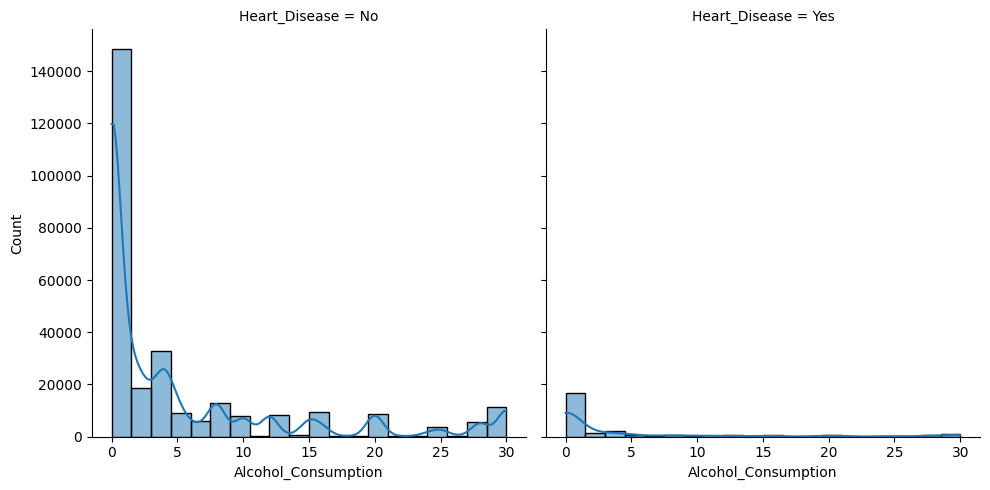

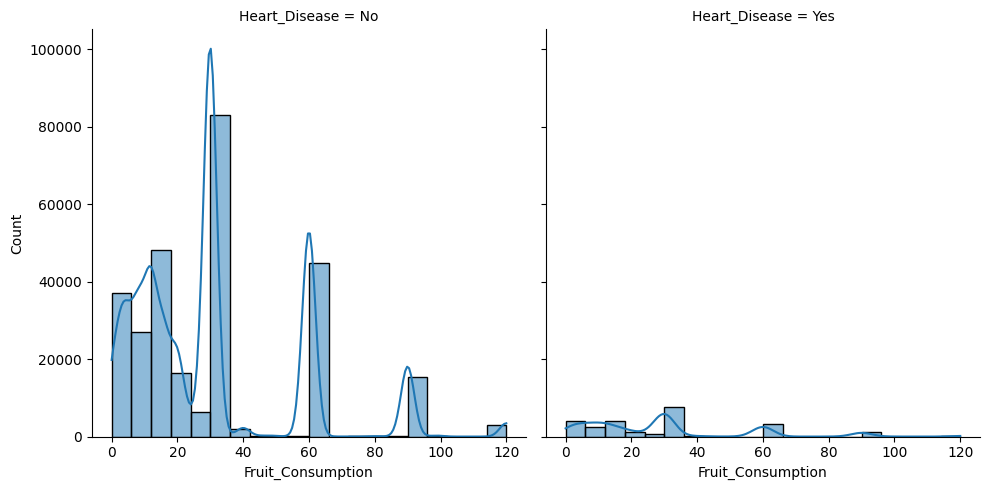

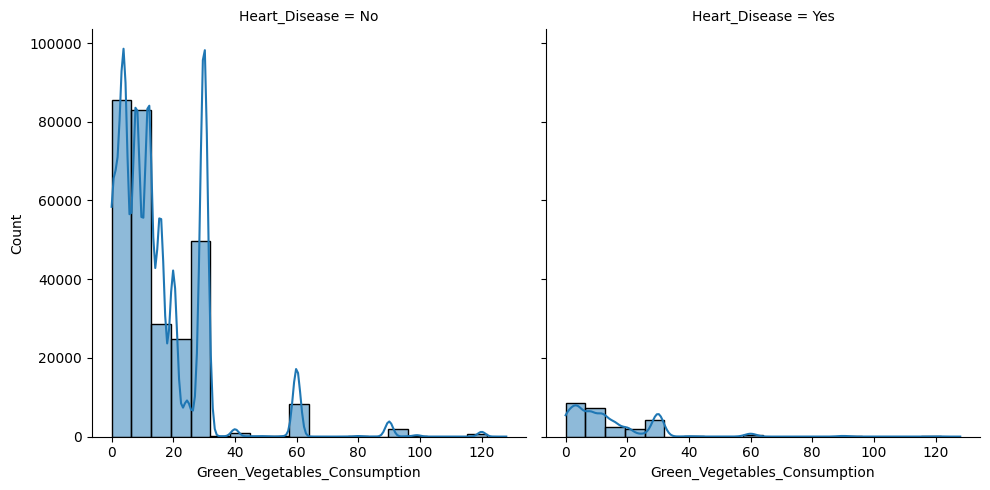

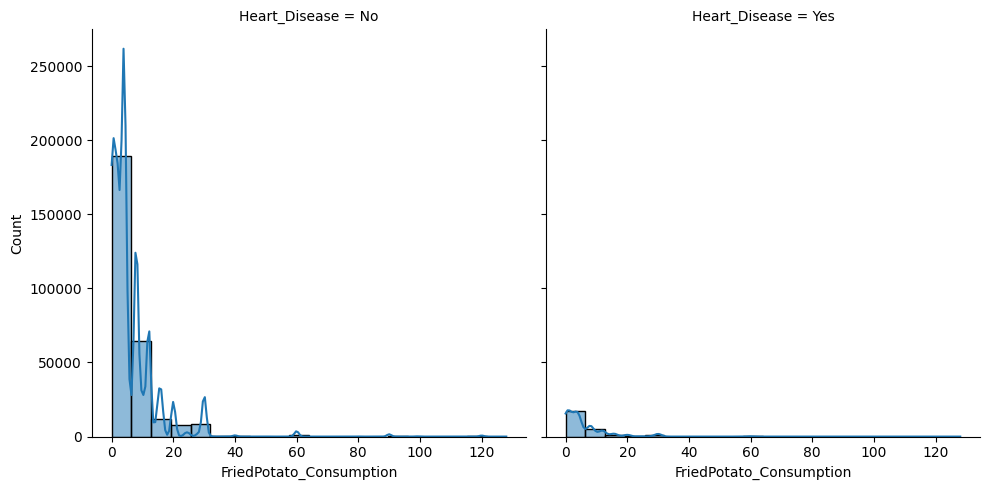

In [ ]:
#fig, axes = plt.subplots(1,3,figsize = (10,6))
sns.displot(df, x="Alcohol_Consumption", bins=20,col = "Heart_Disease",kde = True)
sns.displot(df, x="Fruit_Consumption", bins=20,col = "Heart_Disease",kde = True)
sns.displot(df, x="Green_Vegetables_Consumption", bins=20,col = "Heart_Disease",kde = True)
sns.displot(df, x="FriedPotato_Consumption", bins=20,col = "Heart_Disease",kde = True)


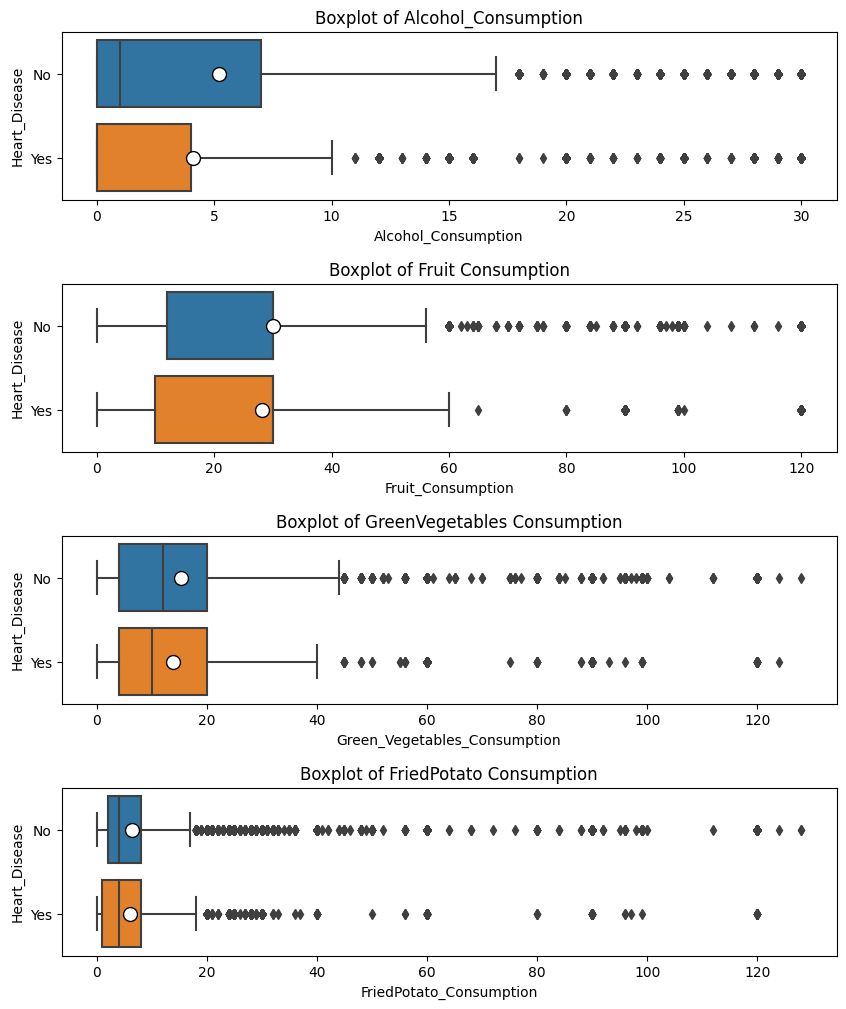

In [ ]:
fig, axes = plt.subplots(4, 1,figsize = (10,12))
ax = sns.boxplot(x="Alcohol_Consumption",y="Heart_Disease",data=df,ax = axes[0],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[0].set_title("Boxplot of Alcohol_Consumption")

ax2 = sns.boxplot(x="Fruit_Consumption",y="Heart_Disease",data=df,ax = axes[1],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[1].set_title("Boxplot of Fruit Consumption")

ax3 = sns.boxplot(x="Green_Vegetables_Consumption",y="Heart_Disease",data=df,ax = axes[2],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[2].set_title("Boxplot of GreenVegetables Consumption")

ax4 = sns.boxplot(x="FriedPotato_Consumption",y="Heart_Disease",data=df,ax = axes[3],meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}, showmeans=True)
axes[3].set_title("Boxplot of FriedPotato Consumption")

plt.subplots_adjust(hspace=0.5)


### คนที่เป็นโรคมะเร็งอื่นๆ มีความถี่ของการสูบบุหรี่เป็นอย่างไรบ้าง

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

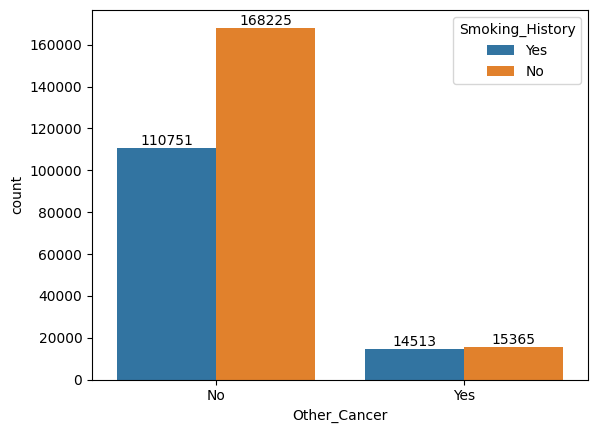

In [ ]:
ax = sns.countplot(data=df, x="Other_Cancer", hue="Smoking_History")
for container in ax.containers: # showing values
    ax.bar_label(container)

### อายุเท่าใดมีความถี่เป็นโรคข้อเสื่อมมากกว่า?

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
is_Arthritis = df.loc[df['Arthritis'] == 'Yes']
isNot_Arthritis = df.loc[df['Arthritis'] == 'No']

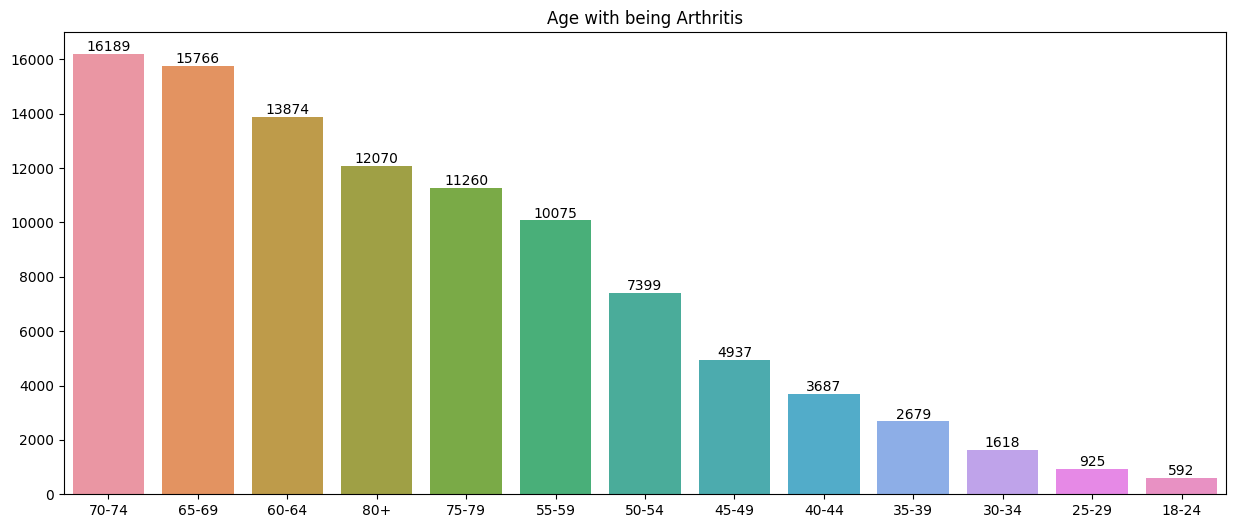

In [ ]:
plt.figure(figsize = (15,6))
age_counts = is_Arthritis['Age_Category'].value_counts()
ax = sns.barplot(x = age_counts.index, y = age_counts.values , data = is_Arthritis)
plt.title("Age with being Arthritis")
for container in ax.containers: # showing values
    ax.bar_label(container)


### ผู้ตอบแบบสอบถามส่วนใหญ่ไปตรวจสุขภาพครั้งล่าสุดเมื่อไหร่โดยแบ่งตามระดับสุขภาพต่างๆ

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

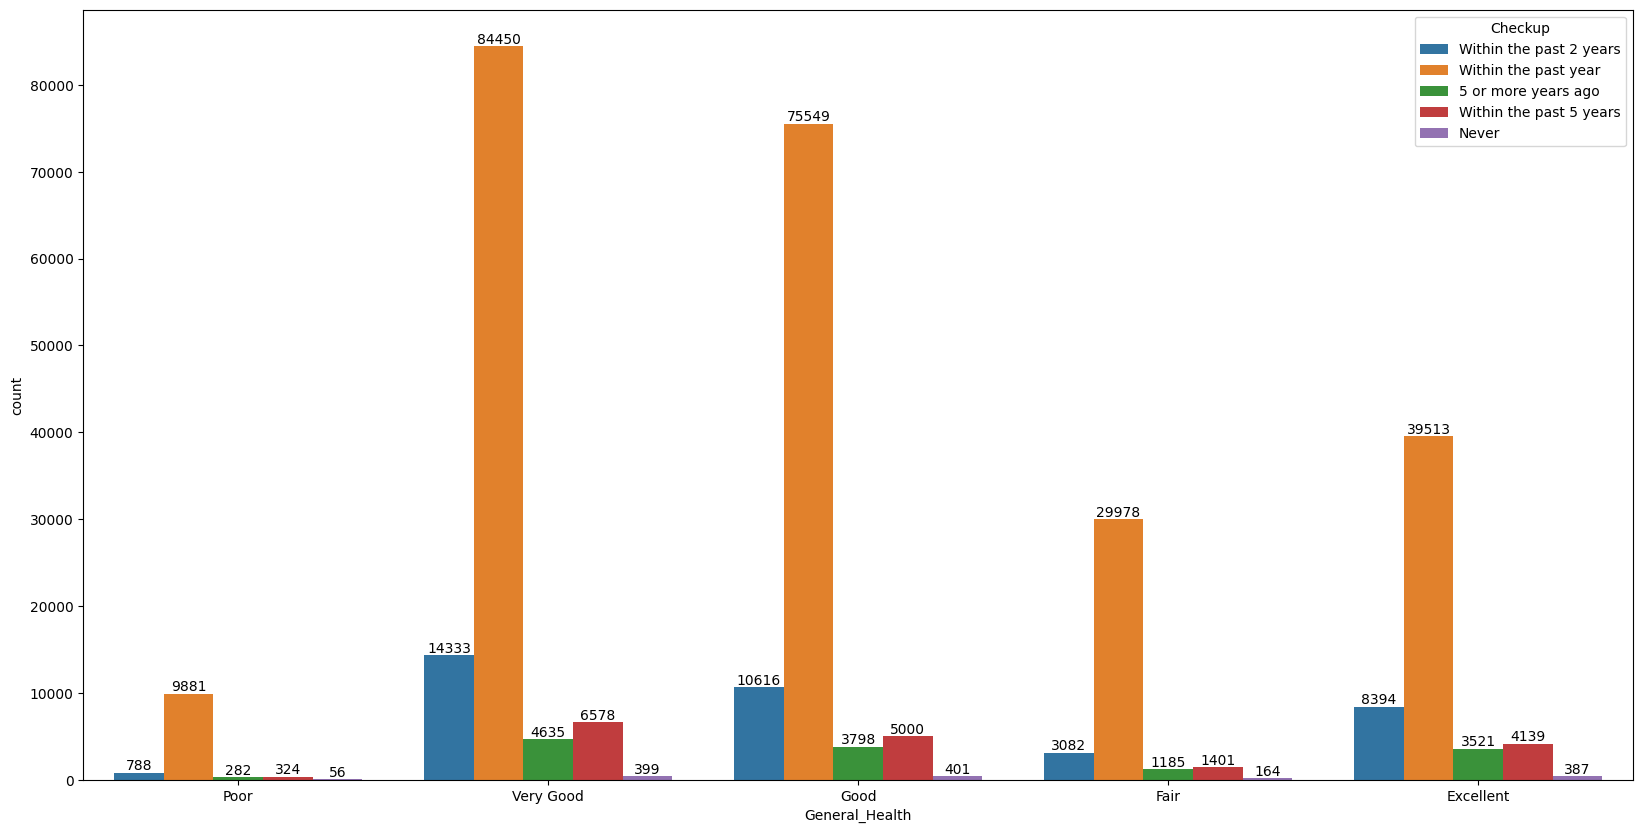

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data=df, x="General_Health", hue="Checkup")
for container in ax.containers: # showing values
    ax.bar_label(container)

### ผู้ตอบแบบสอบถามที่เป็นโรคหัวใจส่วนใหญ่อยู่ในระดับ BMI อยู่ในเกณฑ์ไหน?

ดัชนีมวลกาย (BMI)   =   น้ำหนักตัว (กิโลกรัม) /                                   ส่วนสูง (เมตร) ^ 2
           
ค่า  BMI < 18.5              แสดงถึง            อยู่ในเกณฑ์น้ำหนักน้อยหรือผอม (Underweight)

ค่า  BMI 18.5 – 24.9       แสดงถึง            อยู่ในเกณฑ์ปกติ (Healthy Weight)

ค่า  BMI 25 – 29.9         แสดงถึง            น้ำหนักเกิน (Overweight)

ค่า  BMI >= 30             แสดงถึง            โรคอ้วน (Obesity)





In [ ]:
# สร้าง DataFrame ใหม่ขึ้นมาโดย แบ่งค่า BMI ตามช่วงข้างต้น
df['BMI_cat'] = pd.cut(df['BMI'], bins = [0,18.5,25,30,100] ,
                       labels = ['Underweight','Healthy Weight','Overweight','Obesity'])

df[['BMI_cat']]

,BMI_cat
0,Underweight
1,Overweight
2,Obesity
3,Overweight
4,Healthy Weight
...,...
308849,Overweight
308850,Healthy Weight
308851,Healthy Weight
308852,Healthy Weight


Text(0.5, 1.0, 'BMI Category with Heart Disease')

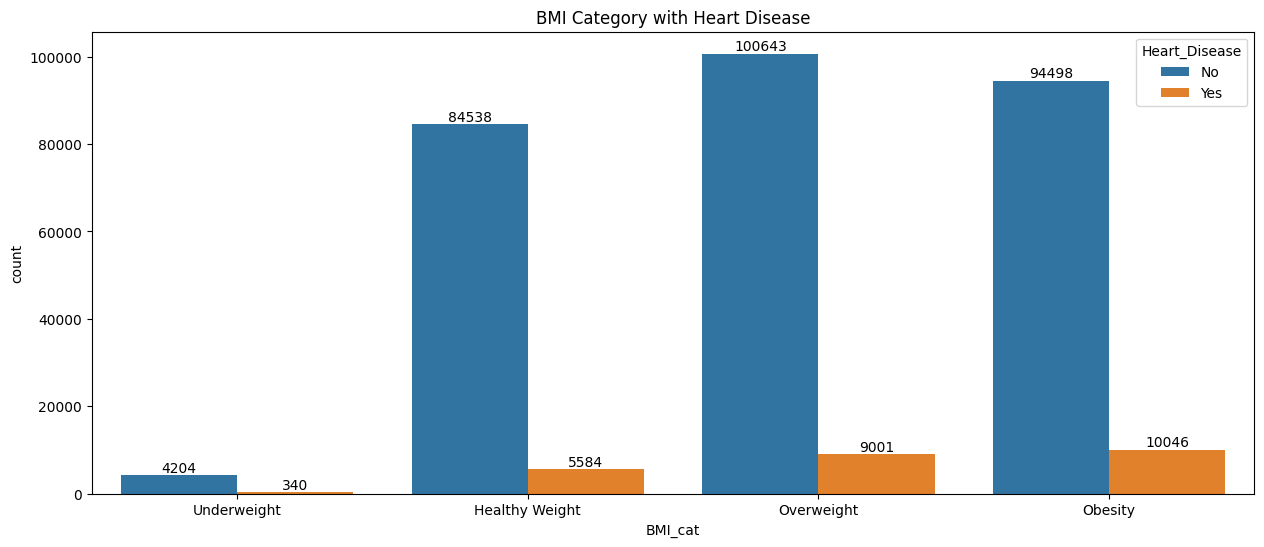

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.countplot(data=df, x="BMI_cat", hue="Heart_Disease")
for container in ax.containers: # showing values
  ax.bar_label(container)
plt.title("BMI Category with Heart Disease")

### BMI กับ Weight (Kg) ของผู้ป่วยเป็นโรคและไม่เป็นโรคหัวใจมีความสัมพันธ์กันอย่างไร

<Axes: xlabel='BMI', ylabel='Weight_(kg)'>

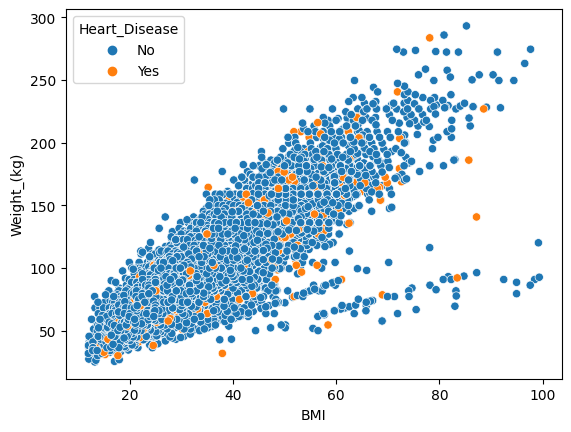

In [ ]:
sns.scatterplot(x="BMI", y="Weight_(kg)", data=df, hue = "Heart_Disease")

### ความสัมพันธ์ของผู้ป่วยที่เป็นโรคหัวใจและมีประวัติการสูบบุหรี่เป็นอย่างไร

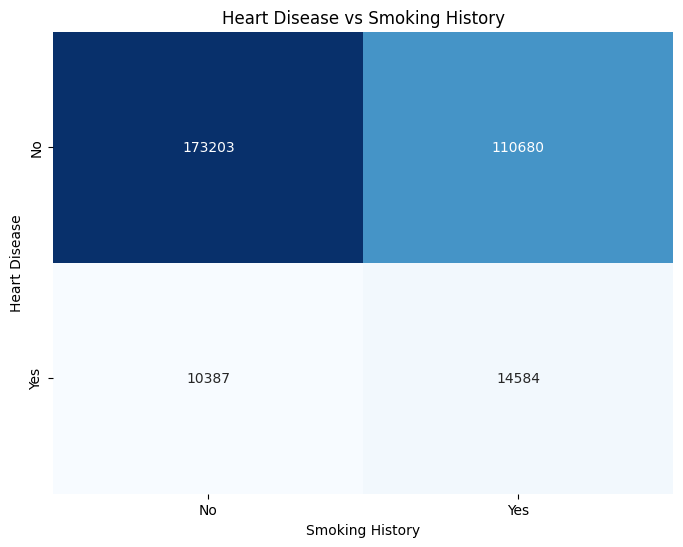

In [ ]:
table = pd.crosstab(df['Heart_Disease'], df['Smoking_History'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(table, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
ax.set_xlabel('Smoking History')
ax.set_ylabel('Heart Disease')
ax.set_title('Heart Disease vs Smoking History')
plt.show()

# Modeling

## Data Preprocessing

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
# ตัวแปรที่ต้องใช้ Ordinal Encoder ได้แก่ General_Health, Checkup
from sklearn.preprocessing import OrdinalEncoder
gh_ranks = ['Poor','Fair','Good','Very Good','Excellent']
od_encoder = OrdinalEncoder(categories = [gh_ranks])
df['General_Health'] = od_encoder.fit_transform(df[['General_Health']])
checkup_ranks = ['Within the past year','Within the past 2 years',
                 'Within the past 5 years','5 or more years ago','Never']
od_encoder2 = OrdinalEncoder(categories = [checkup_ranks])
df['Checkup'] = od_encoder2.fit_transform(df[['Checkup']])


In [ ]:
df[['General_Health','Checkup']]

,General_Health,Checkup
0,0.0,1.0
1,3.0,0.0
2,3.0,0.0
3,0.0,0.0
4,2.0,0.0
...,...,...
308849,3.0,0.0
308850,1.0,2.0
308851,3.0,3.0
308852,3.0,0.0


In [ ]:
# ตัวแปรที่ต้องใช้ Ordinal Encoder ได้แก่ Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis,Smoking_History และ Sex

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

columns_to_encode = ['Exercise', 'Heart_Disease', 'Skin_Cancer',
 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History', 'Sex']
for column in columns_to_encode:
    df[column] = onehot_encoder.fit_transform(df[[column]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
df[['Exercise', 'Heart_Disease', 'Skin_Cancer',
 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History', 'Sex']]

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Smoking_History,Sex
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
308849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
308850,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
308851,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
308852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Age_Category mapping
age_mapping = {'18-24' : 22,'25-29' : 27,'30-34' : 32,
                          '35-39' : 37,'40-44' : 42,'45-49' : 47,
                          '50-54' : 52,'55-59' : 57,'60-64' : 62,
                          '65-69' : 67,'70-74' : 72,'75-79' : 77,
                          '80+' : 80,
}
df['Age_Category'] = df['Age_Category'].map(age_mapping)

#Diabeted mapping
diabetes_mapping = {'Yes' : 1,'No' : 0,
    'No, pre-diabetes or borderline diabetes' : 0,
    'Yes, but female told only during pregnancy' : 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)


In [ ]:
df[['Age_Category','Diabetes']]

,Age_Category,Diabetes
0,72,0
1,72,1
2,62,1
3,77,1
4,80,0
...,...,...
308849,27,0
308850,67,1
308851,32,1
308852,67,0


In [ ]:
df.dtypes

General_Health                  float64
Checkup                         float64
Exercise                        float64
Heart_Disease                   float64
Skin_Cancer                     float64
Other_Cancer                    float64
Depression                      float64
Diabetes                          int64
Arthritis                       float64
Sex                             float64
Age_Category                      int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                 float64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

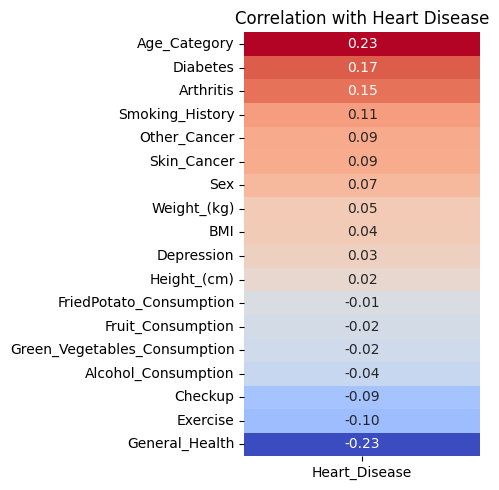

In [ ]:
#check ค่าสัมประสิทธิ์สหสัมพันธ์ (Correlation coefficient)
corr = df.corr()
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
target_corr = corr['Heart_Disease'].drop('Heart_Disease')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Heart Disease')

plt.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import validation_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.pipeline import Pipeline

In [ ]:
df_copy = df.copy()
x = df_copy.drop(['Heart_Disease'],axis = 1)
y = df_copy['Heart_Disease']

Train set accuracy = 0.772430139343891
Test set accuracy = 0.7421673483924582


============ Classification Report (Train data) ============

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76    198717
         1.0       0.76      0.81      0.78    198717

    accuracy                           0.77    397434
   macro avg       0.77      0.77      0.77    397434
weighted avg       0.77      0.77      0.77    397434

============ Classification Report (Test data) ============

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     85166
         1.0       0.20      0.75      0.32      7491

    accuracy                           0.74     92657
   macro avg       0.59      0.75      0.58     92657
weighted avg       0.91      0.74      0.80     92657





Text(627.9949494949494, 0.5, 'True')

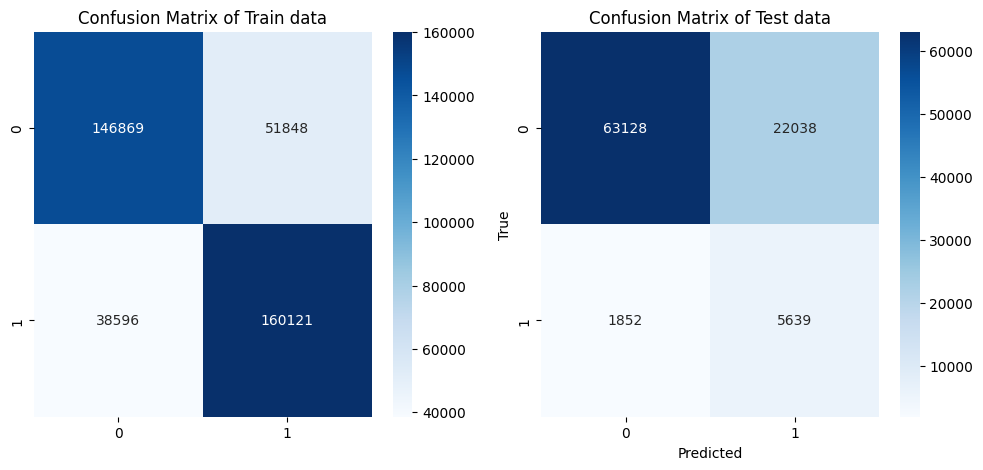

In [ ]:
# Logistic Regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                        stratify = y,random_state = 42)
# ใช้ SMOTE มาจัดการกับความสมดุลของข้อมูล Train ในแต่ละคลาส
sm = SMOTE(sampling_strategy='minority')
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
# สร้าง Pipeline สําหรับทํา Scaler และ ML
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr',LogisticRegression(random_state = 42))
])
lr_pipeline.fit(x_train_resampled,y_train_resampled)
lr_preds_train = lr_pipeline.predict(x_train_resampled)
lr_preds_test = lr_pipeline.predict(x_test)

score_train= accuracy_score(y_train_resampled,lr_preds_train)
score_test = accuracy_score(y_test,lr_preds_test)
print("Train set accuracy = " + str(score_train))
print("Test set accuracy = " + str(score_test))
print("\n")
print("============ Classification Report (Train data) ============\n")
print(classification_report(y_train_resampled, lr_preds_train))
print("============ Classification Report (Test data) ============\n")
print(classification_report(y_test, lr_preds_test))
print("\n")

cm_train = metrics.confusion_matrix(y_train_resampled, lr_preds_train)
cm_test = metrics.confusion_matrix(y_test, lr_preds_test)
fig, axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax = axes[0])
axes[0].set_title("Confusion Matrix of Train data")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax = axes[1])
axes[1].set_title("Confusion Matrix of Test data")
plt.xlabel('Predicted')
plt.ylabel('True')

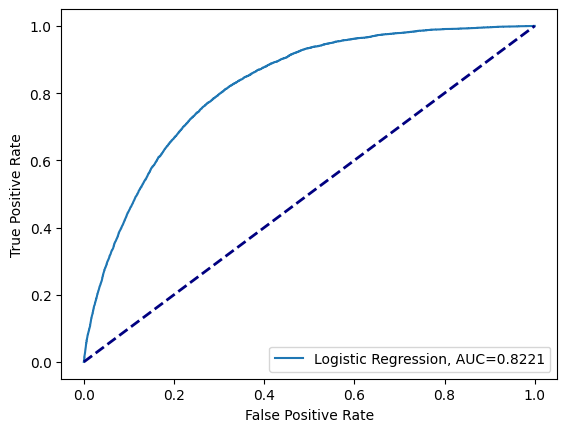

In [ ]:
#Plot ROC Curves (Logistic Regression)
Y_pred = lr_pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, Y_pred)
auc = round(metrics.roc_auc_score(y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

In [ ]:
len(y_train_resampled)

397434

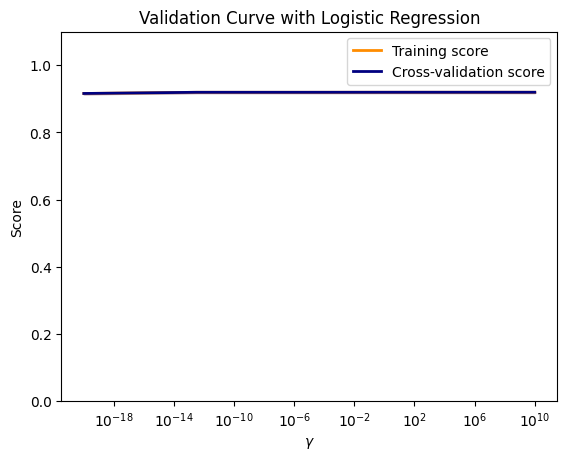

train_scores =  [[0.91543563 0.91570159 0.91552284 0.91562692 0.91573099]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.9191591  0.91914753 0.91925785 0.91903237 0.91948912]
 [0.9191591  0.91914753 0.91925785 0.91903237 0.91948912]]

valid_scores =  [[0.91644311 0.91572618 0.91447536 0.91574736 0.91567798]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91933395 0.91958834 0.91877703 0.92007216 0.91859201]
 [0.91933395 0.91958834 0.91877703 0.92007216 0.91859201]]


In [ ]:
#x_train_resampled_lg = x_train_resampled[:10000]
#y_train_resampled_lg = y_train_resampled[:10000]
param_range = np.logspace(-20,10, 5)
#np.logspace(-20, -1, 5)
#[0.0000001,0.00001,0.001, 0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
     lr_pipeline, x_train, y_train, param_name="lr__C",
     param_range=param_range,scoring="accuracy",n_jobs=2,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()
print("train_scores = ",train_scores)
print("\nvalid_scores = ",test_scores)


Text(0.5, 1.0, 'Learning Curve for Logistic Regression')

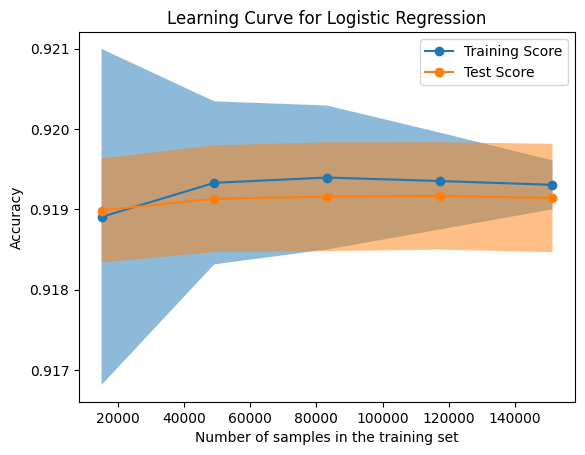

In [ ]:
#"train_sizes": np.linspace(0.1, 1.0, 5),
# Learning Curve (Logistic Regression)
#x_train_resampled_lg = x_train_resampled[:1000]
#y_train_resampled_lg = y_train_resampled[:1000]
common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.3, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(lr_pipeline, **common_params)
plt.legend(["Training Score", "Test Score"])
plt.title("Learning Curve for Logistic Regression")

## Decision Tree

Train set accuracy = 0.9999924515768656
Test set accuracy = 0.8610250709606397


============ Classification Report (Train data) ============

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    198717
         1.0       1.00      1.00      1.00    198717

    accuracy                           1.00    397434
   macro avg       1.00      1.00      1.00    397434
weighted avg       1.00      1.00      1.00    397434

============ Classification Report (Test data) ============

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     85166
         1.0       0.20      0.23      0.21      7491

    accuracy                           0.86     92657
   macro avg       0.56      0.57      0.57     92657
weighted avg       0.87      0.86      0.87     92657





Text(627.9949494949494, 0.5, 'True')

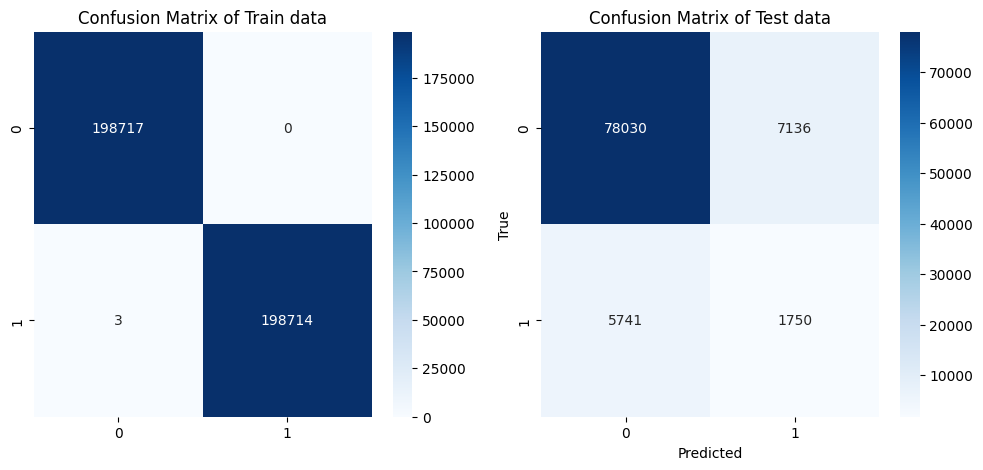

In [ ]:
# Decision Tree
# สร้าง Pipeline สําหรับทํา Scaler และ ML
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt',DecisionTreeClassifier(random_state = 42))
])
dt_pipeline.fit(x_train_resampled,y_train_resampled)
dt_preds_train = dt_pipeline.predict(x_train_resampled)
dt_preds_test = dt_pipeline.predict(x_test)

score_train= accuracy_score(y_train_resampled,dt_preds_train)
score_test = accuracy_score(y_test,dt_preds_test)
print("Train set accuracy = " + str(score_train))
print("Test set accuracy = " + str(score_test))
print("\n")
print("============ Classification Report (Train data) ============\n")
print(classification_report(y_train_resampled, dt_preds_train))
print("============ Classification Report (Test data) ============\n")
print(classification_report(y_test, dt_preds_test))
print("\n")

cm_train = metrics.confusion_matrix(y_train_resampled, dt_preds_train)
cm_test = metrics.confusion_matrix(y_test, dt_preds_test)
fig, axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax = axes[0])
axes[0].set_title("Confusion Matrix of Train data")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax = axes[1])
axes[1].set_title("Confusion Matrix of Test data")
plt.xlabel('Predicted')
plt.ylabel('True')

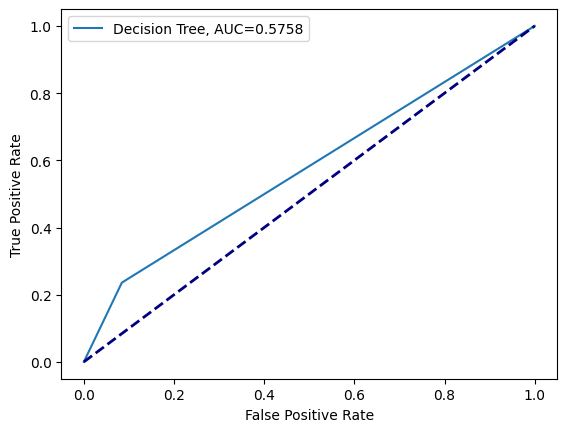

In [ ]:
#Plot ROC Curves
Y_pred = dt_pipeline.predict_proba(x_test)[:, 1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, Y_pred)
auc2 = round(metrics.roc_auc_score(y_test, Y_pred), 4)
plt.plot(fpr2,tpr2,label="Decision Tree, AUC="+str(auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

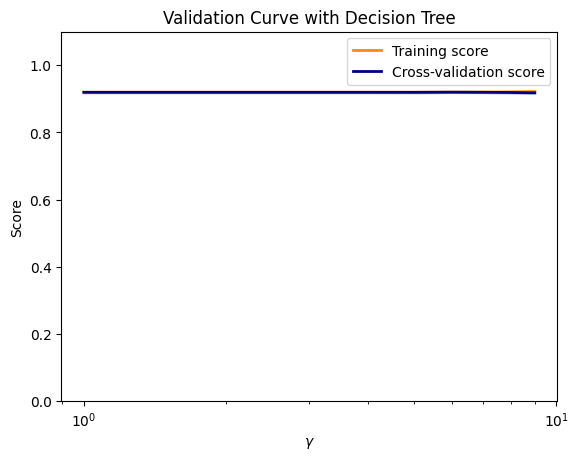

train_scores =  [[       nan        nan        nan        nan        nan]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91933833 0.91914753 0.91923473 0.919148   0.9193388 ]
 [0.91953491 0.91949444 0.91951225 0.91954694 0.91961054]
 [0.919824   0.91977197 0.91973774 0.91966836 0.91978978]
 [0.92039062 0.92040796 0.92045468 0.92014246 0.9204142 ]
 [0.92141399 0.92148916 0.92162259 0.92106176 0.92140288]]

valid_scores =  [[       nan        nan        nan        nan        nan]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91884829 0.91914894 0.9192627  0.91914707 0.91884641]
 [0.91954209 0.9196346  0.91960961 0.9

In [ ]:
# Validation curve
#x_train_resampled_dt = x_train_resampled[:10000]
#y_train_resampled_dt = y_train_resampled[:10000]
param_range = np.arange(0,10)
# np.logspace(-30,6, 5)
#np.arange(0,15)
train_scores, test_scores = validation_curve(
     dt_pipeline, x_train, y_train, param_name="dt__max_depth",param_range=param_range,scoring="accuracy",n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()
print("train_scores = ",train_scores)
print("\nvalid_scores = ",test_scores)


Text(0.5, 1.0, 'Learning Curve for Decision Tree')

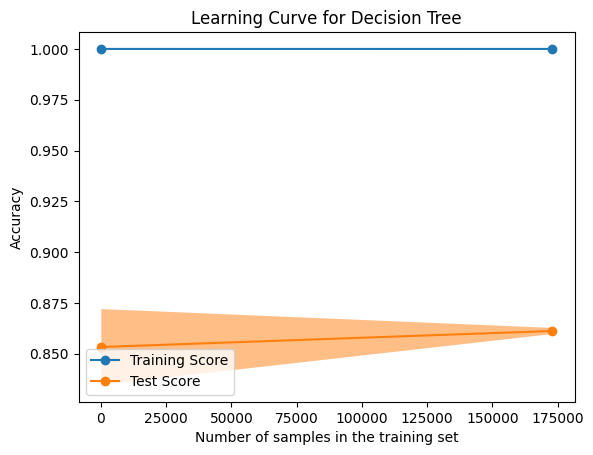

In [ ]:
# Learning curve
#x_train_resampled_dt = x_train_resampled[:10000]
#y_train_resampled_dt = y_train_resampled[:10000]
common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.001, 1.0, 2),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(dt_pipeline, **common_params)
plt.legend(["Training Score", "Test Score"])
plt.title("Learning Curve for Decision Tree")

## Random Forest

Train set accuracy = 0.9999899354358208
Test set accuracy = 0.9177288278273633


============ Classification Report (Train data) ============

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76    198717
         1.0       0.76      0.81      0.78    198717

    accuracy                           0.77    397434
   macro avg       0.77      0.77      0.77    397434
weighted avg       0.77      0.77      0.77    397434

============ Classification Report (Test data) ============

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     85166
         1.0       0.20      0.75      0.32      7491

    accuracy                           0.74     92657
   macro avg       0.59      0.75      0.58     92657
weighted avg       0.91      0.74      0.80     92657





Text(627.9949494949494, 0.5, 'True')

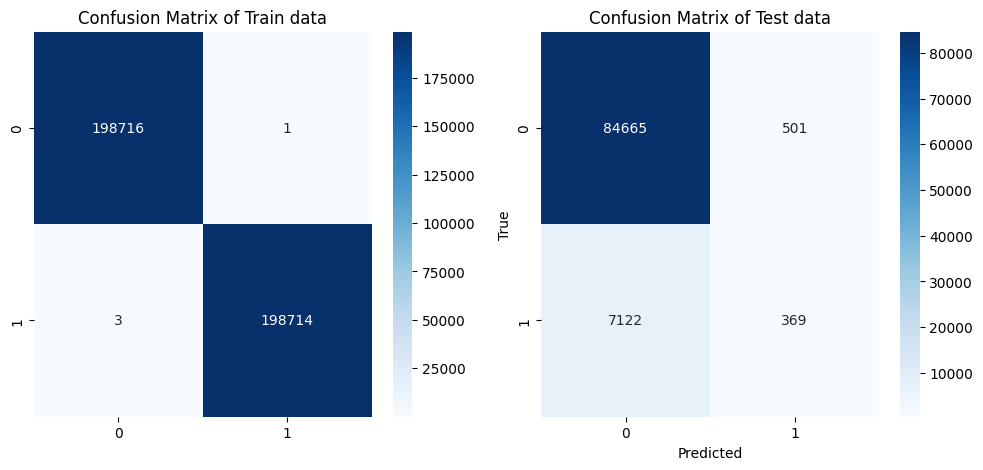

In [ ]:
# Random Forest
# สร้าง Pipeline สําหรับทํา Scaler และ ML
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf',RandomForestClassifier(random_state = 42))
])
rf_pipeline.fit(x_train_resampled,y_train_resampled)
rf_preds_train = rf_pipeline.predict(x_train_resampled)
rf_preds_test = rf_pipeline.predict(x_test)

score_train= accuracy_score(y_train_resampled,rf_preds_train)
score_test = accuracy_score(y_test,rf_preds_test)
print("Train set accuracy = " + str(score_train))
print("Test set accuracy = " + str(score_test))
print("\n")
print("============ Classification Report (Train data) ============\n")
print(classification_report(y_train_resampled, lr_preds_train))
print("============ Classification Report (Test data) ============\n")
print(classification_report(y_test, lr_preds_test))
print("\n")

cm_train = metrics.confusion_matrix(y_train_resampled, rf_preds_train)
cm_test = metrics.confusion_matrix(y_test, rf_preds_test)
fig, axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax = axes[0])
axes[0].set_title("Confusion Matrix of Train data")
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax = axes[1])
axes[1].set_title("Confusion Matrix of Test data")
plt.xlabel('Predicted')
plt.ylabel('True')

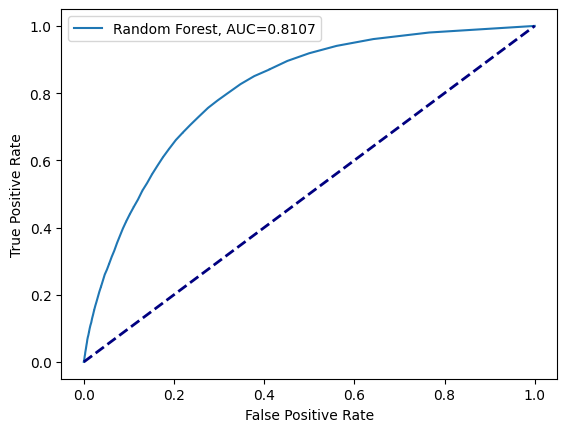

In [ ]:
#Plot ROC Curves (Random Forest)
Y_pred = rf_pipeline.predict_proba(x_test)[:, 1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, Y_pred)
auc3 = round(metrics.roc_auc_score(y_test, Y_pred), 4)
plt.plot(fpr3,tpr3,label="Random Forest, AUC="+str(auc3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

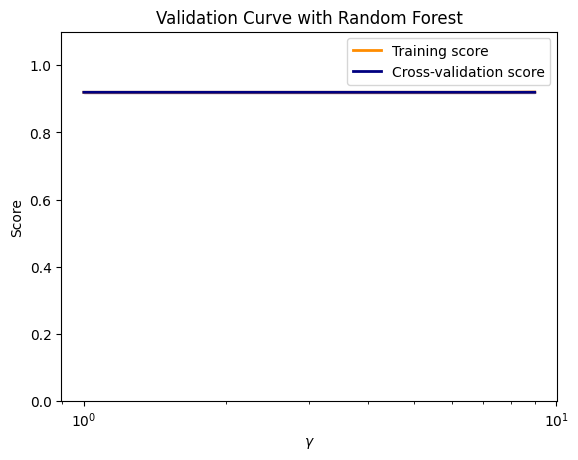

train_scores =  [[       nan        nan        nan        nan        nan]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.919148   0.919148   0.919148  ]
 [0.91914753 0.91914753 0.91917113 0.919148   0.91916535]
 [0.91924582 0.91933255 0.91928676 0.91939083 0.91940818]
 [0.91977197 0.91980666 0.92002105 0.91980134 0.92007886]]

valid_scores =  [[       nan        nan        nan        nan        nan]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.91914707 0.91914707]
 [0.91914894 0.91914894 0.91914707 0.9

In [ ]:
# Validation curve
#x_train_resampled_rf = x_train_resampled[:10000]
#y_train_resampled_rf = y_train_resampled[:10000]
param_range = np.arange(0, 10)
train_scores, test_scores = validation_curve(
     rf_pipeline, x_train, y_train, param_name="rf__max_depth",param_range=param_range,scoring="accuracy",n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()
print("train_scores = ",train_scores)
print("\nvalid_scores = ",test_scores)


Text(0.5, 1.0, 'Learning Curve for Random Forest')

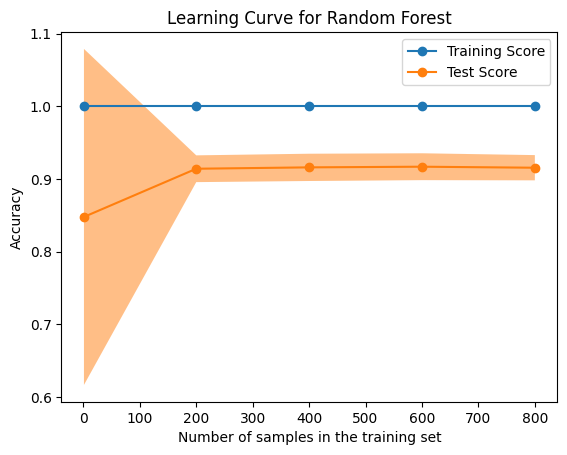

In [ ]:
# Learning curve
#x_train_resampled_rf = x_train_resampled[:1000]
#y_train_resampled_rf = y_train_resampled[:1000]
common_params = {
    "X": x_train[:1000],
    "y": y_train[:1000],
    "train_sizes": np.linspace(0.001, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(rf_pipeline, **common_params)
plt.legend(["Training Score", "Test Score"])
plt.title("Learning Curve for Random Forest")

## เปรียบเทียบประสิทธิภาพของโมเดลทั้ง 3 วิธีด้วย ROC Curves

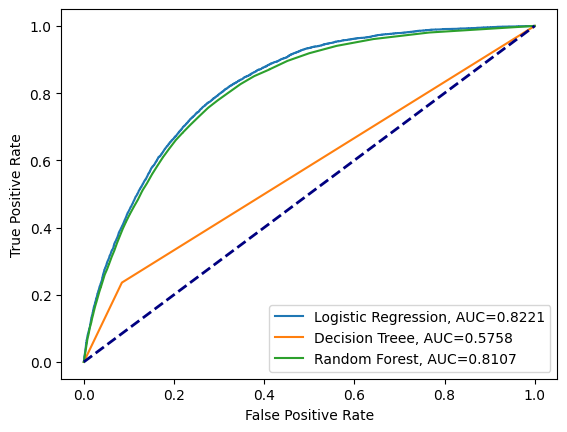

In [ ]:
#Plot ROC Curves
Y_pred = rf_pipeline.predict_proba(x_test)[:, 1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, Y_pred)
auc3 = round(metrics.roc_auc_score(y_test, Y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.plot(fpr2,tpr2,label="Decision Treee, AUC="+str(auc2))
plt.plot(fpr3,tpr3,label="Random Forest, AUC="+str(auc3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()